## SETUP

In [56]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [57]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.13.0


## 데이터셋 적재

In [58]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [59]:
X_train_full.shape

(60000, 28, 28)

In [60]:
X_train_full.dtype

dtype('uint8')

In [61]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

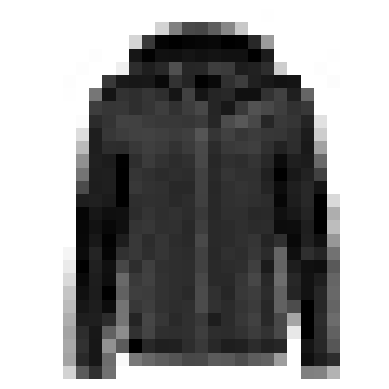

In [62]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [63]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [64]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [65]:
class_names[y_train[0]]

'Coat'

In [66]:
X_valid.shape

(5000, 28, 28)

In [67]:
X_test.shape

(10000, 28, 28)

그림 저장: fashion_mnist_plot


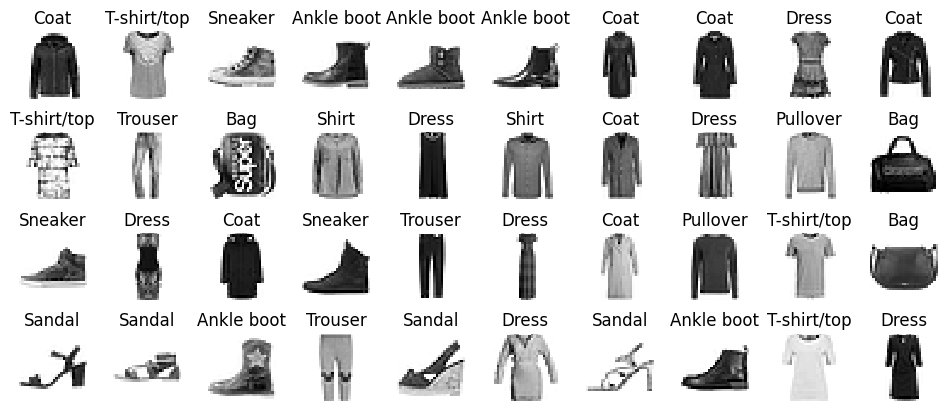

In [68]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

2개의 은닉층으로 이루어진 분류용 다층 퍼셉트론

In [69]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [70]:
model.layers

In [71]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [72]:
# 다른 initialization method
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [73]:
model.layers

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


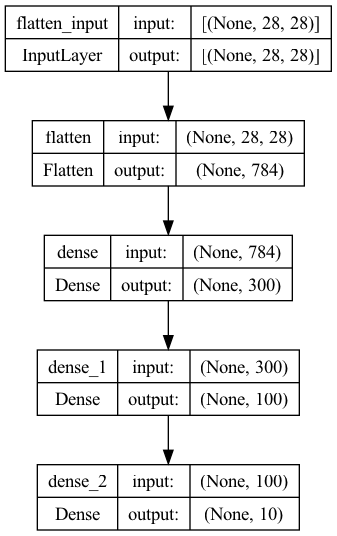

In [24]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [78]:
hidden1 = model.layers[1]

In [79]:
hidden1.name

'dense'

In [80]:
model.get_layer('dense') is hidden1

True

In [81]:
weights, biases = hidden1.get_weights()

In [82]:
weights

array([[ 0.01275932, -0.00787348,  0.02583476, ..., -0.04100662,
         0.04229758,  0.0472123 ],
       [ 0.01507586, -0.01537813, -0.04132443, ...,  0.06928726,
         0.0426368 ,  0.07138386],
       [ 0.0735388 ,  0.07222742, -0.02690751, ..., -0.05867003,
         0.04584923, -0.02014864],
       ...,
       [ 0.04281079,  0.07397564, -0.02339891, ..., -0.07284878,
        -0.06438395, -0.05316311],
       [ 0.06586024,  0.02838711,  0.03608071, ..., -0.05326694,
         0.04256574, -0.02675926],
       [-0.00381697,  0.04109412,  0.07015012, ...,  0.00688101,
        -0.0420856 ,  0.03282277]], dtype=float32)

In [83]:
weights.shape

(784, 300)

In [84]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [85]:
biases.shape

(300,)

In [88]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [89]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7143 - accuracy: 0.7682 - val_loss: 0.5107 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 2s 967us/step - loss: 0.4859 - accuracy: 0.8298 - val_loss: 0.4358 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 2s 988us/step - loss: 0.4412 - accuracy: 0.8449 - val_loss: 0.5213 - val_accuracy: 0.7978
Epoch 4/30
1719/1719 [==============================] - 2s 980us/step - loss: 0.4145 - accuracy: 0.8552 - val_loss: 0.3946 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 2s 958us/step - loss: 0.3962 - accuracy: 0.8604 - val_loss: 0.3799 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 2s 981us/step - loss: 0.3778 - accuracy: 0.8674 - val_loss: 0.3750 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 2s 979us/step - loss: 0.3657 - accuracy: 0.8695 - val_loss: 0.3659 - v

In [91]:
history.params
# 훈련 파라미터

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [92]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [93]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [98]:
print(history.history)

{'loss': [0.7142940759658813, 0.4859437942504883, 0.4411689341068268, 0.41449955105781555, 0.39624398946762085, 0.3778397738933563, 0.3657086193561554, 0.354507714509964, 0.3439320921897888, 0.3344947099685669, 0.3264533281326294, 0.31726327538490295, 0.3100171983242035, 0.3041232228279114, 0.29617801308631897, 0.2915351390838623, 0.28581297397613525, 0.2797640562057495, 0.2747173607349396, 0.2695741057395935, 0.2643521726131439, 0.2596886157989502, 0.2552013397216797, 0.25093576312065125, 0.24663901329040527, 0.2425352782011032, 0.2385183721780777, 0.23524120450019836, 0.23104071617126465, 0.22702591121196747], 'accuracy': [0.7681636214256287, 0.8297818303108215, 0.8449090719223022, 0.8551818132400513, 0.8603636622428894, 0.8674181699752808, 0.8695454597473145, 0.8739091157913208, 0.8779818415641785, 0.8812909126281738, 0.8828727006912231, 0.8853999972343445, 0.8885818123817444, 0.890181839466095, 0.8931272625923157, 0.8949636220932007, 0.8968363404273987, 0.8986363410949707, 0.900727

그림 저장: keras_learning_curves_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/ann/keras_learning_curves_plot.png'

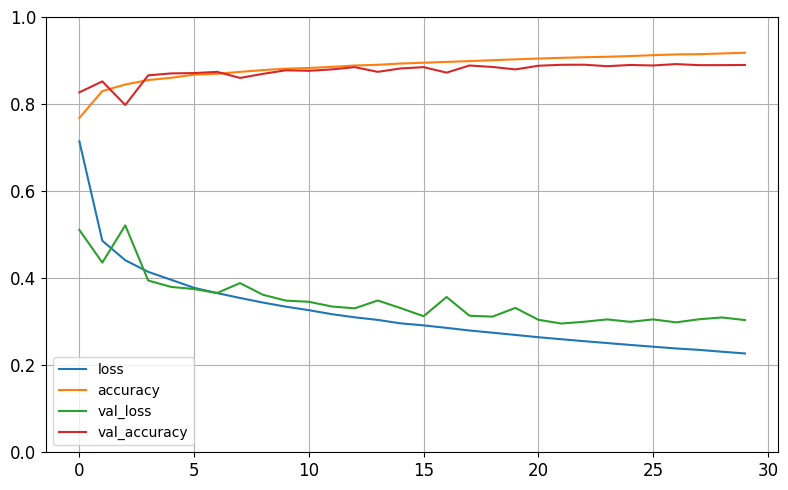

In [99]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()